In [1]:
# !pip3 install praw

import praw
from praw.models import MoreComments
# import pandas as pd
# import numpy as np
# nltk - natural langauge processing
# wordcloud - for draw ing word cloud
# matplotlib - for charting

# from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
# from nltk.corpus import stopwords
# from nltk.stem import PorterStemmer
# from wordcloud import WordCloud
# import matplotlib.pyplot as plt
# import seaborn as sns
# from itertools import cycle, islice
# from nltk.util import ngrams


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import stylecloud
# from itertools import cycle, islice
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer
from nltk.util import ngrams
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud

In [2]:
reddit = praw.Reddit(client_id='Uqa0qPvYrRATm6WB2yy6vw', client_secret='ExLLWnJZrEJ5XrSdU9GQ074YOoOg5A', user_agent='sentiment')

In [3]:
def get_whole_thread(submission):
    # d = {}
    comments = []
    for top_level_comment in submission.comments:
        # print("COMMENT:")
        # print(top_level_comment.body)
        # d[top_level_comment.body] = []
        comments.append(top_level_comment.body)
        replies = []
        replies.extend(top_level_comment.replies)
        while replies:
            reply = replies.pop(0)
            if isinstance(reply, MoreComments):
                continue
            # print("    SUBCOMMENT:")
            # print(reply.body)
            # d[top_level_comment.body].append(reply.body)
            comments.append(reply.body)
            # print("________")
            replies = list(reply.replies) + replies
    return comments

In [4]:
subreddit = reddit.subreddit("SGExams")
cnt = 0
posts = []
print("start")
for submission in subreddit.search("smu cs"):
    post = []
    post.append(submission.title)
    post.append(submission.selftext)
    comments = get_whole_thread(submission)
    post.append(comments)
    posts.append(post)

print('end')

start
end


In [5]:
df = pd.DataFrame(posts,columns=['title', 'body', 'comments'])
# print(df)
# df.to_csv("reddit_sg_exams.csv", sep='\t')
df.head()

,title,body,comments
0,[uni] SMU CS discovery day,got an acceptance email tdy for SMU CS saying ...,"[wat ur rp?, 82.5, I was equally as surprised ..."
1,[Uni] SMU cs or NUS cs,"\n\nHello, i’m looking to apply for my uni cou...","[Tbh and no offense to OP, I keep seeing these..."
2,[uni] SMU CS vs IS,"hi there, i just wanted to ask any students in...","[>hey ! current smu cs student, imo the resour..."
3,[A levels] NTU CS /NTU CE and SMU IS/SMU CS,So I got 75rp and can't go to NTU/SMU CS so I ...,[Go to NTU CE or SIT UOG if you really want to...
4,[UNI] How is SMU CS like?,Got rejected by NTU and NUS... I have attended...,[I would like to know too I’m thinking of join...


In [6]:
# qn_content = ''
# for line in df['title']:
#     if 'ntu' in line.lower() and 'cs' in line.lower():   
#         print(line)

In [7]:
only_ntu = df[df['title'].str.contains('NTU')]
only_ntu.head()

,title,body,comments
3,[A levels] NTU CS /NTU CE and SMU IS/SMU CS,So I got 75rp and can't go to NTU/SMU CS so I ...,[Go to NTU CE or SIT UOG if you really want to...
5,[Uni] SMU CS vs NTU CS,"Hey, anyone able to shed some light on SMU Com...",[Im unable to comment on SMU CS but I'm able t...
12,[Uni] NTU business and computing and SMU CS+BIZ,Hi all would need some advice on these choices...,"[[deleted], I havent seen anyone below 80, I h..."
14,[Uni] SMU CS or NTU CE,I just received admissions from these two Univ...,"[[deleted], Care to explain?]"
19,[UNI] NUS CS VS NTU CN YANG SCHOLARS PROGRAMME...,Hi! I would like to know whether I should cho...,[go cnyang if you want to do research. If unsu...


[A levels] NTU CS /NTU CE and SMU IS/SMU CS
[Uni] SMU CS vs NTU CS
[Uni] NTU business and computing and SMU CS+BIZ
[Uni] SMU CS or NTU CE
[A levels] SMU IS vs SIT CS vs NTU CE vs SUTD ISTD
[Uni] What are the job prospects of a biz degree? Should I study biz at NUS or CS at NTU/SMU?
[Uni] I need some help in choosing uni course. NTU or SMU for CS? seniors please give me your input!!


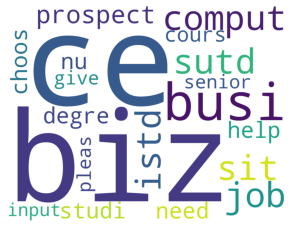

In [64]:
# NTU in the TITLE with SMU CS

stop_words = stopwords.words('english')
stop_words.extend(['ntu', 'uni', 'smu', 'cs', 'vs', 'level', 'levels'])

# for (columnName, columnData) in oe_qn.iteritems():
qn_content = ''
for line in df['title']:
#     for sentence in line:
    if 'ntu' in line.lower() and 'cs' in line.lower() and 'smu' in line.lower() and 'transfer' not in line.lower(): # Eliminates empty answers
        qn_content += line.lower() + ' '    
        print(line)
        #print(qn_content)

# Tokenize Words
tokenizer = RegexpTokenizer(r'\w+')
words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words
#print(words_content)
#print(len(words_content))

# Remove stop words
words_filtered = []
for w in words_content:
    if w not in stop_words:
        words_filtered.append(w)

#print(words_filtered)
#print(len(words_filtered))

# Porter Stemmer
porter_stemmer = PorterStemmer()

words_stemmed = []
for w in words_filtered:
    words_stemmed.append(porter_stemmer.stem(w))

#print(words_stemmed)

# WordCloud
words_joined = " ".join([w for w in words_stemmed])

# Create a word cloud
my_wordcloud = WordCloud(background_color='white',
                     width=1800,
                     height=1400).generate(words_joined)

plt.imshow(my_wordcloud)
plt.axis('off')
plt.show()
# plt.title('SMU thread related to NTU')
# plt.savefig(columnName, dpi=300)

In [42]:
# # NTU in the TITLE with SMU CS + check the BODY of these 
# stop_words = stopwords.words('english')
# stop_words.extend(['ntu', 'uni', 'nus','smu', 'sure', 'seem', 'cs', 'year', 'thank', 'thanks', 'vs', 'level','really', 'levels', 'joinchat', 
#                    'got', 'lot', 'ask','feel', 'one', 'make', 'however', 'tat', 'want', 'think', 'i', 'am', "im", 'since'])

# only_ntu = df[df['title'].str.contains('NTU')]
# #only_ntu.head()

# # for (columnName, columnData) in oe_qn.iteritems():
# qn_content = ''
# for line in only_ntu['body']:
# #     for sentence in line:
#     if 'joinchat' not in line.lower(): # Eliminates empty answers
#         df['body']
#         qn_content += line.lower() + ' '    
#         print(line)
#         print('--------------------------------------------------------------------------------')
#         #print(qn_content)

# # Tokenize Words
# tokenizer = RegexpTokenizer(r'\w+')
# words_content = tokenizer.tokenize(qn_content)  # All answers for that question into words
# #print(words_content)
# #print(len(words_content))

# # Remove stop words
# words_filtered = []
# for w in words_content:
#     if w not in stop_words:
#         words_filtered.append(w)

# #print(words_filtered)
# #print(len(words_filtered))

# # Porter Stemmer
# porter_stemmer = PorterStemmer()

# words_stemmed = []
# for w in words_filtered:
#     words_stemmed.append(porter_stemmer.stem(w))

# #print(words_stemmed)

# # WordCloud
# words_joined = " ".join([w for w in words_stemmed])

# # Create a word cloud
# my_wordcloud = WordCloud(background_color='white',
#                      width=1800,
#                      height=1400).generate(words_joined)

# plt.imshow(my_wordcloud)
# plt.axis('off')
# plt.show()
# # plt.title('SMU thread related to NTU')
# # plt.savefig(columnName, dpi=300)

In [65]:
only_ntu = df[df['title'].str.contains('NTU')]
only_ntu.head()

,title,body,comments
3,[A levels] NTU CS /NTU CE and SMU IS/SMU CS,So I got 75rp and can't go to NTU/SMU CS so I ...,[Go to NTU CE or SIT UOG if you really want to...
5,[Uni] SMU CS vs NTU CS,"Hey, anyone able to shed some light on SMU Com...",[Im unable to comment on SMU CS but I'm able t...
12,[Uni] NTU business and computing and SMU CS+BIZ,Hi all would need some advice on these choices...,"[[deleted], I havent seen anyone below 80, I h..."
14,[Uni] SMU CS or NTU CE,I just received admissions from these two Univ...,"[[deleted], Care to explain?]"
19,[UNI] NUS CS VS NTU CN YANG SCHOLARS PROGRAMME...,Hi! I would like to know whether I should cho...,[go cnyang if you want to do research. If unsu...


In [66]:
# original stopwords
def original_stopwords():
    return stopwords.words('english')

In [67]:
def extract_text(df):
    for(columnName, columnData) in df.iteritems():
        qn_content = []
        for line in df[columnName]:
            if len(line.strip()) > 0: # Eliminates empty answers
                qn_content.append(line)
    return qn_content

In [68]:
# Helper Function for Tokenisation of text content, returns a list of word or words depending on ngrams defined
def token_fn(sentence_list, n, stop_words_custom):
    output = []
    for line in sentence_list:
        token = word_tokenize(line)
        gram = list(ngrams(token, n))
        
        if n == 1:
            for content in gram:
                for word in content:
                    if word not in stop_words_custom:
                        output.append(word)   
        else:
            for content in gram:
                link = ''
                for word in content:
                    link += word + '_'
                link = link[:-1]
                output.append(link)
    return output

# Helper Function for Stemming using Porter Stemmer, returns a list of stemmed words
def stem_fn(word_list):
    porter_stemmer = PorterStemmer()
    words_stemmed = []
    for w in words_list:
        words_stemmed.append(porter_stemmer.stem(w))
    
    return words_stemmed

# Helper Function for Word Cloud Generation
def wc_fn(word_list, title, no_word_max):
    words_joined = " ".join([w for w in word_list])
    my_wordcloud = WordCloud(background_color='white', max_words = no_word_max, 
                             max_font_size = 1000,
                             width=2500,
                             height=1400).generate(words_joined)
    plt.imshow(my_wordcloud)
    plt.axis('off')
    plt.title(title)
    plt.show()

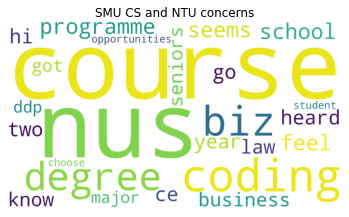

In [62]:
# # Top commmon body for SMU & NTU

# Top commmon comments for SMU & NTU

smu_ntu_body = only_ntu.iloc[:, [1]]
#print(smu_ntu_comments)

sw = original_stopwords()
sw.extend(['seem', 'computing', 'course,' 'hi', 'ntu', 'tat', 'much', 'able', 'cs','want', 'smu', 'sure', 'im', 'thank', 'based', 'city', 'really', 
           'if' , ' for' , 'but' , 'in', 'the', 'you', 'it', "i'm" ,'rank', 'points', 'lol', 'bro', 'cmi', 'hahah' , 'i' , 'but' ,
           'and', 'one', 'well', 'but_i', 'i_am'])

sentences = []
for sentence in smu_ntu_body["body"]:
#     for comment in commentArray:
    if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower():
        sentences.append(sentence.lower())

        # Eliminates empty answers
single_word = token_fn(sentences, 1, sw)
double_word = token_fn(sentences, 2, sw)
triple_word = token_fn(sentences, 3, sw)

wc_fn(single_word, 'SMU CS and NTU concerns', 25)
# wc_fn(double_word, 'SMU CS and NTU concerns', 10)
# wc_fn(triple_word, 'SMU CS and NTU concerns', 25)

#stylecloud
sc_words = " ".join([w.upper() for w in single_word])
# sc_words_2 = " ".join([w.upper() for w in double_word])
# sc_words_3 = " ".join([w.upper() for w in triple_word])

stylecloud.gen_stylecloud(sc_words,
                          icon_name = 'fas fa-question',
                          palette ='cartocolors.qualitative.Bold_8',
                          background_color = 'black',
                          output_name ='smu_ntu_concerns_single.png',
                          collocations = False,
                          custom_stopwords = sw)

# stylecloud.gen_stylecloud(sc_words_2,
#                           icon_name = 'fas fa-question',
#                           palette ='cartocolors.qualitative.Bold_8',
#                           background_color = 'black',
#                           output_name ='smu_ntu_concerns_double.png',
#                           collocations = False,
#                           custom_stopwords = sw)

# stylecloud.gen_stylecloud(sc_words_3,
#                           icon_name = 'fas fa-question',
#                           palette ='cartocolors.qualitative.Bold_8',
#                           background_color = 'black',
#                           output_name ="smu_ntu_concerns_triple.png",
#                           collocations = False,
#                           custom_stopwords = sw)
                          
## References ###
# icon_name: https://fontawesome.com/
# palette: https://jiffyclub.github.io/palettable/cartocolors/qualitative/


# From single word WC: Probably related to the skills / majors that are offered SCIS
# From double & triple word WC: SCIS offers industry-based and practical skills, Less technical or more-friendly degrees
# as well as smart-city management

So I got 75rp and can't go to NTU/SMU CS so I was thinking of NTU CE. I realised that NTU CE has pretty similar mods to NTU CS. I heard that its possible to transfer from NTU CE to NTU CS if one does relatively well in the first year? Same from SMU IS to SMU CS. Any idea how well one has to do gpa + portfolio wise in order to do so? Because if its too risky I'm thinking of SIT UOG instead. Thanks in advance!


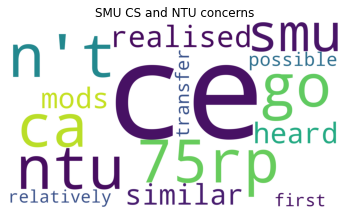

Hey, anyone able to shed some light on SMU Comp Sci vs NTU Comp Sci?  Right off the bat, NTU's Curriculum is 'heavier' as compared to SMU but does it really boil down to that?

&#x200B;

\- These are the two universities I have in mind as of now, currently in Year 3 Sem 2 with a GPA of 3.90.

\- Offered Early Admission for SMU CS. No news from NTU yet.


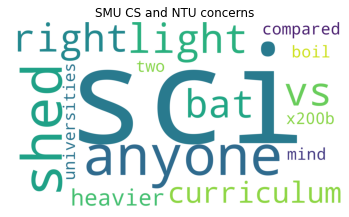

Hi all would need some advice on these choices! 

My dad has been hinting to me NTU due to its “prestige” and wide connections it has, which i admit can be beneficial but definitely not a major dealbreaker in deciding my choice (at least for me) 

But hav heard that the teaching culture in NTU is nt tat good whereby profs are v much in to their research only, also i myself am nt rlly sure if i will be able to handle the rigorous curriculum of this programme, so would also like to ask if is it possible to drop to computing with a major/minor in business halfway through my studies? 

As for SMU, the age of the programme is a little worrying as its still young and im nt rlly sure what do employers view upon a CS programme from a business specialist school but i heard tat smu teaching is better, which i feel is more impt to me in general. However, from what i read it is harder to do well in smu cs since the cohort is v small and hence the bell curve is v high... Also from what i know for S

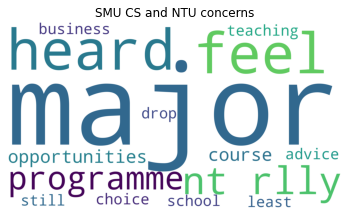

I just received admissions from these two Universities. But I'm having some troubles deciding which of the two should I choose. I really liked coding in general but I am not sure which of the two should I go...


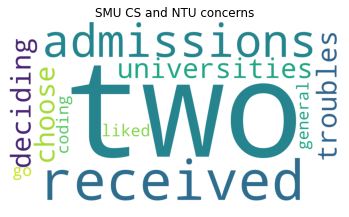

 Hi! I would like to know whether I should choose between NTU CS with CN Yang programme or NUS CS with merit scholarship. I know that NUS CS is much better in terms of the range of modules and specialisations available, and NUS generally has more resources than NTU. But with CN Yang programme, will it make NTU CS programme on par with NUS CS in terms of opportunities?

What are the main differences between NTU CS and NUS CS programme? Also, if any seniors/alumni has went through your decision to choose NTU CS vs NUS/SMU CS, would appreciate your thoughts on choosing the school! Thank you!


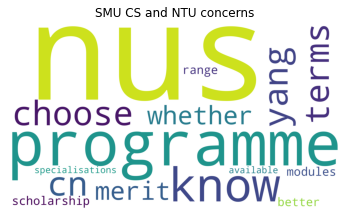

Hi post As student here! I'm currently looking through the courses offered by the universities and I'm rather interested in CS.

Based on my research, I'm most interested in CS NUS but I think it's abit hopeless for me to get AAA/A(rip H2 math), and apparently for NTU it's AAB/B so perhaps I may have a chance?

However I'm not very sure how different the courses offered by these schools are? From researching online, NUS seem to be the most popular while SMU seems the most expensive. However I'm not sure what exactly is different in the course content so it'll be great if there's any seniors here in CS who can share some insight.

Also, for some reason SMU computing law have a lower igp than SMU CS but I'm not too sure what exactly it's all about. From the website, it seems to be half computing half law, but it's taught under the school of computing and information system? Is the focus even or leaning towards one or the other, and do one have to go through the stuff that a typical law s

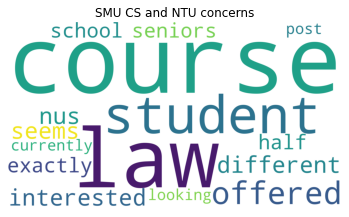

Hi I received my A lvl results this year and got 75rp, I've taken computing for O lvls and A lvls and enjoyed the practical aspect of it, so I'm looking for a computing related course in Uni.

I searched multiple sources online and came to this conclusion.

SMU IS -> Business(more than coding) + Computing (less technical and less coding, coding mostly front-end), only course out of these 4 that offers the business element. 

NTU CE -> Lots of math involved + hardware + more coding than SMU IS, very hard course

SUTD ISTD -> More coding than SMU IS, closer to a coding degree like CS? (I'm not exactly sure what's the difference btwn CS and ISTD)

SIT CS - > lots of coding(IoT), math involved but not as tough as CE math, dives deeper into the technicalities of coding(back-end), does it being primarily focused on IoT limit my career options compared to other CS degrees?

In terms of my priorities:

1. SIT CS/SMU IS/SUTD ISTD
2. NTU CE

Multiple sources online agreed that its better to pick

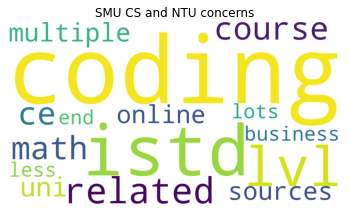

Abit of background , I am Y1S2 student studying at NTU but recently I felt that studying here is quite stressful and unhappy due to the large of module to study in one semester and was not able to keep up with my studies. I have already failed some modules for Y1 and I don’t feel like studying and do not have any motivation anymore.

I keep hearing from friends that Studying Information system at SMU is slightly less stressful and is much better at pacing due to less module.

What is the right thing to do at this point ?


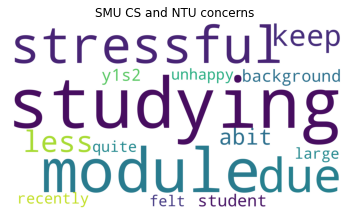

Aside from the meme because “can’t get into nus” and location(Pulau ntu), why did you choose NTU or NUS?


I’m sure there are people who scored perfect grades but chose to go NTU over NUS and vice versa, why? I’m having a hard time selecting the school. I am considering SMU CS as well.
There are about two weeks left before I have to accept and would love insights

Thanks a lot


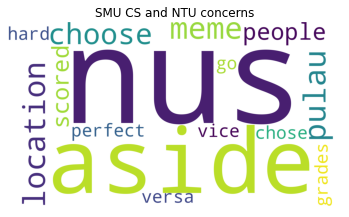

I just got my A level results and scored 81.25rp without Mother tongue. Ik NUS gives an additional 2.5 rp for first choice options. I initially wanted to try for NUS biz but my parents arent really that accepting and my cousins told me the job prospects are bad for biz degree. It seems that my family only want me to study CS due to the high demand but i have little to no knowledge about coding (i only tried python a few months ago and i only know how to “print(smth)” (i forgot lol)) and idk if i would actually enjoy coding. For context i only scored one A for a levels (chemistry), everything else B and gp C 😔 (PCMe) and PW A

Ik that for NUS biz they offer Biz+CS but im not too sure of the requirements. Must your A level score satisfy both degrees or can i just maintain a 3.75 GPA and study one CS mod to qualify for double degree at the end of first year? (Honestly idk if i really want to do this because double degrees seems like a LOT)


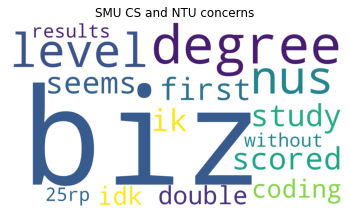

So ive been contemplating about whether to choose Computer science in NTU or this new joint degree called computing and law in SMU for quite some time. I qualified for both courses but i am really torn between the 2.

I like computing and law for SMU as it fulfills a criteria of taking on jobs that facilitate the merging of modern technology (more specifically AI) and the law industry, which is still very much reliant on individual lawyers to go through tedious briefs etc. (heard from relatives working in the industry) and the job prospect seems to be good. But the course seems really new and people with much lower rank points than me seems to be getting accepted easily.

This makes me a little worried about the quality of the course and the professor. On the other hand, NTU's CS course is tried and tested, its the most "risk free" option.

Another reason that im leaning towards SMU is their style of education. I feel thaf seminar styled lecture really suit me as im the noisy type that

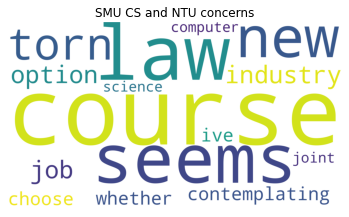

Hi all, I'm an a level graduate with 75rp and I am really interested in CS courses. I wanted to apply for nus/ntu cs before I got my results but 75 definitely doesn't meet the igp. So I'm considering SMU's courses and was wondering if any Infosys seniors could provide an overview of your experience at smu!

I am also considering SMU's new work study software engineering and NTU's computer engineering. If anyone has their opinions or advice regarding these courses, feel free to comment down below as well. Thank you!


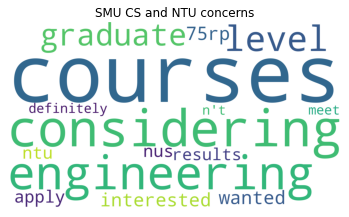

Initially I’ve alr decided to go for NTU business and computing double degree. However, after visiting the school campus, it really turned me down and disappointed because the SCSE building looks like a factory.... and many people are telling me the negative things about NTU. 
I am also offered business and computer science double degree in SMU, however, people say that the computer science degree in smu is not technical and not a good degree for CS. I’m very lost now, can someone give some insights? Any NTU CS seniors can share your experience, how are the profs, environment and internship opportunities?

[Edit] : I’ve chosen NTU, thanks for all the suggestions! :D


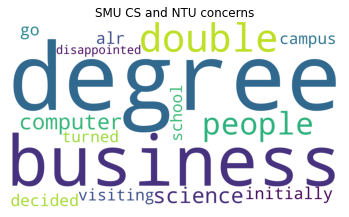

Hi all, im currently considering betw NTU DDP (acc and biz w minor in int trading) and SMU BIZ. Would like to ask how's the workload of ddp like? Is it manageable with ccas and events? Since biz and acc is not as contrasting as other ddp like biz and cs, does that mean i would have overlapping modules? Im actually quite worried that i would not be able to cope as i got in ddp with 78.75rp (which is maybe the 10th percentile or lower?) In the worst case scenario, is it possible to drop either degree?

I would also like to know if getting a double degree would rly give u an edge over others in the similar industry? Currently torn betw the two schs as i am rly interested in doing a second major in smu as well as i would have a more flexible timeable and also get to focus on non acad areas like ccas and community service...but i want to experience ntu hall life too, hence rn my biggest worry for ntu is the workload. 

Would appreciate any form of input/personal experience/advice, thank you

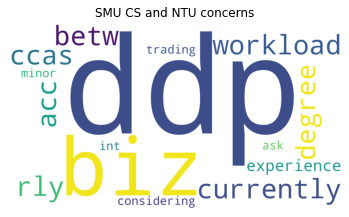

In [73]:
# # Top commmon body for SMU & NTU

# Top commmon comments for SMU & NTU

smu_ntu_body = only_ntu.iloc[:, [1]]
#print(smu_ntu_comments)

sw = original_stopwords()
sw.extend(['seem', 'computing', 'comp','got', 'hi', 'ntu', 'tat', 'much', 'able', 'cs','want', 'smu', 'sure', 'im', 'thank', 'based', 'city', 'really', 
           'if' , ' for' , 'but' , 'in', 'the', 'you', 'it', "i'm" ,'rank', 'points', 'lol', 'bro', 'cmi', 'hahah' , 'i' , 'but' ,
           'and', 'one', 'well', 'but_i', 'i_am' , 'pretty', 'thinking', 'hey'])

# sentences = []
for sentence in smu_ntu_body["body"]:
    sentences = []
#     for comment in commentArray:
    if len(sentence.lower().strip()) > 0 and 'https' not in sentence.lower():
        sentences.append(sentence.lower())
        
        print(sentence)

        # Eliminates empty answers
        single_word = token_fn(sentences, 1, sw)
        double_word = token_fn(sentences, 2, sw)
        triple_word = token_fn(sentences, 3, sw)

        wc_fn(single_word, 'SMU CS and NTU concerns', 15)
        # wc_fn(double_word, 'SMU CS and NTU concerns', 10)
        # wc_fn(triple_word, 'SMU CS and NTU concerns', 25)

        #stylecloud
        sc_words = " ".join([w.upper() for w in single_word])
        # sc_words_2 = " ".join([w.upper() for w in double_word])
        # sc_words_3 = " ".join([w.upper() for w in triple_word])

        stylecloud.gen_stylecloud(sc_words,
                                  icon_name = 'fas fa-question',
                                  palette ='cartocolors.qualitative.Bold_8',
                                  background_color = 'black',
                                  output_name ='smu_ntu_concerns_single.png',
                                  collocations = False,
                                  custom_stopwords = sw)

# stylecloud.gen_stylecloud(sc_words_2,
#                           icon_name = 'fas fa-question',
#                           palette ='cartocolors.qualitative.Bold_8',
#                           background_color = 'black',
#                           output_name ='smu_ntu_concerns_double.png',
#                           collocations = False,
#                           custom_stopwords = sw)

# stylecloud.gen_stylecloud(sc_words_3,
#                           icon_name = 'fas fa-question',
#                           palette ='cartocolors.qualitative.Bold_8',
#                           background_color = 'black',
#                           output_name ="smu_ntu_concerns_triple.png",
#                           collocations = False,
#                           custom_stopwords = sw)
                          
## References ###
# icon_name: https://fontawesome.com/
# palette: https://jiffyclub.github.io/palettable/cartocolors/qualitative/


# From single word WC: Probably related to the skills / majors that are offered SCIS
# From double & triple word WC: SCIS offers industry-based and practical skills, Less technical or more-friendly degrees
# as well as smart-city management

In [58]:
# # Top commmon comments for SMU & NTU

# smu_ntu_comments = only_ntu.iloc[:, [2]]
# # print(smu_ntu_comments)

# sw = original_stopwords()
# sw.extend(['seemed', 'want', 'smu', 'based', 'city', 'really', 'if' , ' for' , 'but' , 'in', 'the', 'you', 'it', "i'm"
#           ,'rank', 'points', 'lol', 'bro', 'cmi', 'hahah' , 'i' , 'but' , 'and', 'one', 'well'])

# sentences = []
# for commentArray in smu_ntu_comments["comments"]:
#     for comment in commentArray:
#         if len(comment.lower().strip()) > 0 and 'https' not in comment.lower():
#             sentences.append(comment.lower())
                          
# # Eliminates empty answers
# single_word = token_fn(sentences, 1, sw)
# double_word = token_fn(sentences, 2, sw)
# triple_word = token_fn(sentences, 3, sw)

# wc_fn(single_word, 'SMU CS and NTU concerns', 15)
# wc_fn(double_word, 'SMU CS and NTU concerns', 15)
# wc_fn(triple_word, 'SMU CS and NTU concerns', 15)

# #stylecloud
# sc_words = " ".join([w.upper() for w in single_word])
# sc_words_2 = " ".join([w.upper() for w in double_word])
# sc_words_3 = " ".join([w.upper() for w in triple_word])

# stylecloud.gen_stylecloud(sc_words,
#                           icon_name = 'fas fa-question',
#                           palette ='cartocolors.qualitative.Bold_8',
#                           background_color = 'black',
#                           output_name ='smu_ntu_concerns_single.png',
#                           collocations = False,
#                           custom_stopwords = sw)

# stylecloud.gen_stylecloud(sc_words_2,
#                           icon_name = 'fas fa-question',
#                           palette ='cartocolors.qualitative.Bold_8',
#                           background_color = 'black',
#                           output_name ='smu_ntu_concerns_double.png',
#                           collocations = False,
#                           custom_stopwords = sw)

# stylecloud.gen_stylecloud(sc_words_3,
#                           icon_name = 'fas fa-question',
#                           palette ='cartocolors.qualitative.Bold_8',
#                           background_color = 'black',
#                           output_name ="smu_ntu_concerns_triple.png",
#                           collocations = False,
#                           custom_stopwords = sw)
                          
# ## References ###
# # icon_name: https://fontawesome.com/
# # palette: https://jiffyclub.github.io/palettable/cartocolors/qualitative/


# # From single word WC: Probably related to the skills / majors that are offered SCIS
# # From double & triple word WC: SCIS offers industry-based and practical skills, Less technical or more-friendly degrees
# # as well as smart-city management